In [49]:
#task 1
class BankAccount:
    def __init__(self, owner, balance=0):
        self._owner = owner
        self._balance = balance
    def deposit(self, amount):
        if amount > 0:
            self._balance += amount
    def withdraw(self, amount):
        if amount < 0:
            print('Ошибка: сумма снятия отрицательна')
        elif self._balance < amount:
            print('Ошибка: недостаточно средств')
        else:
            self._balance -= amount
    def get_balance(self):
        return self._balance

In [48]:
#task 2
class Book:
    def __init__(self, title, author, year, status = "доступна"):
        self._title = title
        self._author = author
        self._year = year
        self._status = status
    def __str__(self):
        return "'" + self._title + "'" + " (" + str(self._year) + "), автор: " + self._author + ", статус: " + self._status
    def borrow(self):
        self._status = "на полке"
        print("Книга '" + self._title + "' взята в аренду.")
    def return_book(self):
        self._status = "доступна"
        print("Книга '" + self._title + "' возвращена.")

class Library:
    def __init__(self, books=[]):
        self._books = books
    def add_book(self, book):
        self._books += [book]
        print("Книга '" + book._title + "' добавлена в библиотеку.")
    def remove_book(self, book):
        i = self._book.find(book)
        self._book.pop(i)
        pass
    def find_book_by_title(self, title):
        for book in self._books:
            if title == book._title:
                return book
    def list_available_books(self):
        for book in self._books:
            if book._status == "доступна":
                print(book.__str__())

MSE = 3637.654135338346; R2 = 0.3261491756691697


<AxesSubplot: >

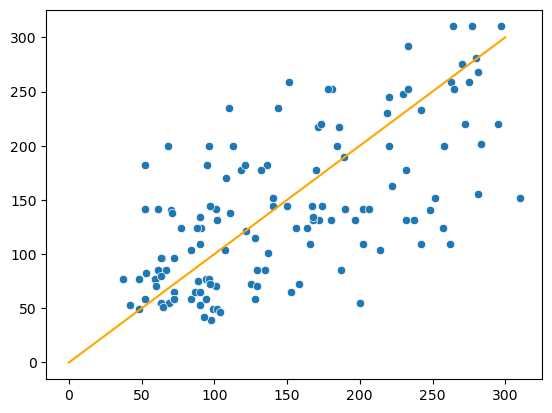

In [10]:
#task 3
import sklearn
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.datasets
import sklearn.preprocessing
import numpy as np
import seaborn as sns
import pandas as pd

diabetes = pd.read_csv('diabetes.csv')
x = diabetes[['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]
y = diabetes['Y']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.3, random_state=42)
y_train = np.array(y_train)
y_test = np.array(y_test)

scaler = sklearn.preprocessing.StandardScaler()
scaler = scaler.fit(x)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

reg2 = sklearn.linear_model.LogisticRegression()
reg2.fit(x_train_scaled, y_train)
y_pr = reg2.predict(x_test_scaled)
MSE = sklearn.metrics.mean_squared_error(y_test, y_pr)
R2 = sklearn.metrics.r2_score(y_test, y_pr)
print('MSE =', str(MSE) + ';', 'R2 =', R2)

sns.scatterplot(x = y_test, y = y_pr)
sns.lineplot(x=[0,300], y=[0,300], color='orange')

MSE = 0.43900278660826075; R2 = 0.6694100883465415

Features of decreasing importance (with F-statistic):
MedInc: 18556.57163129322
AveRooms_bin_3: 2490.453062352656
AveOccup_bin_3: 1123.6652910715136
AveOccup_bin_0: 755.2470380112836
AveRooms_bin_1: 438.96521711751575
Latitude: 438.0054534277304
AveRooms_bin_0: 313.9094527379095
HouseAge_bin_3: 126.68980475373014
HouseAge_bin_0: 86.05800987440917
AveRooms_bin_2: 78.23390766041592
AveOccup_bin_1: 77.89460967380079
AveBedrms: 45.108575622583956
Longitude: 43.69897612569005
Population: 12.54741033174213
AveOccup_bin_2: 9.973193743152734
HouseAge_bin_1: 2.8968059686268854
HouseAge_bin_2: 0.5176873358891947

without categorical features:
MSE = 0.5421315248419516; R2 = 0.5917492590725093
with "HouseAge":
MSE = 0.5319073901177868; R2 = 0.5994485172510475
with "AveRooms":
MSE = 0.5340936887801769; R2 = 0.5978021307047758
with "AveOccup":
MSE = 0.45783880568214474; R2 = 0.6552256729590038

MSE_ordinal = 0.45050587750894155; R2_ordinal = 0.6607

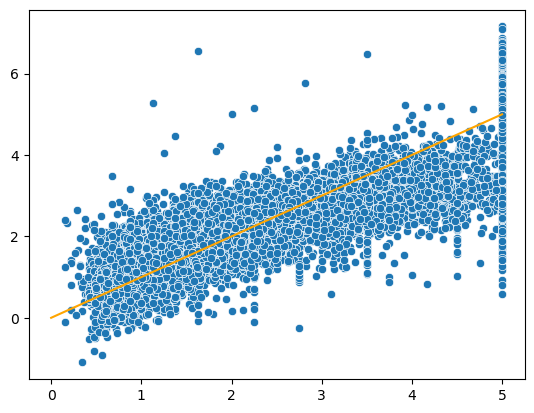

In [3]:
#task 4
import sklearn
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.datasets
import sklearn.preprocessing
import sklearn.feature_selection
import numpy as np
import pandas as pd
import seaborn as sns

data = sklearn.datasets.fetch_california_housing()
x = data['data']
y = data['target']
categorical_features = ["HouseAge", "AveRooms", "AveOccup"]  

binner = sklearn.preprocessing.KBinsDiscretizer(n_bins=4, encode="onehot-dense", strategy="quantile")
x_categorical = binner.fit_transform(x[:, [1,2,5]])
x_categorical_df = pd.DataFrame(x_categorical, columns=[f"{col}_bin_{i}" for col in categorical_features for i in range(4)])
x_categorical_df[['MedInc', 'AveBedrms', 'Population', 'Latitude', 'Longitude']] = x[:, [0, 3, 4, 6, 7]]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_categorical_df, y, test_size=0.8, random_state=42)

reg = sklearn.linear_model.LinearRegression()
reg.fit(x_train, y_train)
y_pr = reg.predict(x_test)
MSE = sklearn.metrics.mean_squared_error(y_test, y_pr)
R2 = sklearn.metrics.r2_score(y_test, y_pr)
print('MSE =', str(MSE) + ';', 'R2 =', R2)
print()

sns.scatterplot(x = y_test, y = y_pr)
sns.lineplot(x=[0,5], y=[0,5], color='orange')

f, p = sklearn.feature_selection.f_regression(x_categorical_df, y)
features = dict()
for i in range(17):
    features[x_categorical_df.keys()[i]] = f[i]
print('Features of decreasing importance (with F-statistic):')
significant_features = sorted(features.keys(), key=lambda x: features[x], reverse=True)
for ftr in significant_features:
    print(ftr + ':', features[ftr])
print()

x_df = pd.DataFrame()
x_df[['MedInc', 'AveBedrms', 'Population', 'Latitude', 'Longitude']] = x[:, [0, 3, 4, 6, 7]]
x_train0, x_test0, y_train0, y_test0 = sklearn.model_selection.train_test_split(x_df, y, test_size=0.8, random_state=42)
reg.fit(x_train0, y_train0)
y_pr0 = reg.predict(x_test0)
MSE0 = sklearn.metrics.mean_squared_error(y_test0, y_pr0)
R2_0 = sklearn.metrics.r2_score(y_test0, y_pr0)
print('without categorical features:')
print('MSE =', str(MSE0) + ';', 'R2 =', R2_0)

x_df1 = pd.DataFrame(x_categorical[:, [0,1,2,3]], columns=[f"{categorical_features[0]}_bin_{i}" for i in range(4)])
x_df1[['MedInc', 'AveBedrms', 'Population', 'Latitude', 'Longitude']] = x[:, [0, 3, 4, 6, 7]]
x_train1, x_test1, y_train1, y_test1 = sklearn.model_selection.train_test_split(x_df1, y, test_size=0.8, random_state=42)
reg.fit(x_train1, y_train1)
y_pr1 = reg.predict(x_test1)
MSE1 = sklearn.metrics.mean_squared_error(y_test1, y_pr1)
R2_1 = sklearn.metrics.r2_score(y_test1, y_pr1)
print('with "HouseAge":')
print('MSE =', str(MSE1) + ';', 'R2 =', R2_1)

x_df2 = pd.DataFrame(x_categorical[:, [4,5,6,7]], columns=[f"{categorical_features[1]}_bin_{i}" for i in range(4)])
x_df2[['MedInc', 'AveBedrms', 'Population', 'Latitude', 'Longitude']] = x[:, [0, 3, 4, 6, 7]]
x_train2, x_test2, y_train2, y_test2 = sklearn.model_selection.train_test_split(x_df2, y, test_size=0.8, random_state=42)
reg.fit(x_train2, y_train2)
y_pr2 = reg.predict(x_test2)
MSE2 = sklearn.metrics.mean_squared_error(y_test2, y_pr2)
R2_2 = sklearn.metrics.r2_score(y_test2, y_pr2)
print('with "AveRooms":')
print('MSE =', str(MSE2) + ';', 'R2 =', R2_2)

x_df3 = pd.DataFrame(x_categorical[:, [8,9,10,11]], columns=[f"{categorical_features[2]}_bin_{i}" for i in range(4)])
x_df3[['MedInc', 'AveBedrms', 'Population', 'Latitude', 'Longitude']] = x[:, [0, 3, 4, 6, 7]]
x_train3, x_test3, y_train3, y_test3 = sklearn.model_selection.train_test_split(x_df3, y, test_size=0.8, random_state=42)
reg.fit(x_train3, y_train3)
y_pr3 = reg.predict(x_test3)
MSE3 = sklearn.metrics.mean_squared_error(y_test3, y_pr3)
R2_3 = sklearn.metrics.r2_score(y_test3, y_pr3)
print('with "AveOccup":')
print('MSE =', str(MSE3) + ';', 'R2 =', R2_3)
print()

x_categorical_df['HouseAge_ordinal'] = x_categorical_df['HouseAge_bin_1'] + x_categorical_df['HouseAge_bin_2']*2 + x_categorical_df['HouseAge_bin_3']*3
x_categorical_df['AveRooms_ordinal'] = x_categorical_df['AveRooms_bin_1'] + x_categorical_df['AveRooms_bin_2']*2 + x_categorical_df['AveRooms_bin_3']*3
x_categorical_df['AveOccup_ordinal'] = x_categorical_df['AveOccup_bin_1'] + x_categorical_df['AveOccup_bin_2']*2 + x_categorical_df['AveOccup_bin_3']*3
x_ordinal_df = x_categorical_df[['MedInc', 'AveBedrms', 'Population', 'Latitude', 'Longitude', 'HouseAge_ordinal', 'AveRooms_ordinal', 'AveOccup_ordinal']]
x_train_ordinal, x_test_ordinal, y_train_ordinal, y_test_ordinal = sklearn.model_selection.train_test_split(x_ordinal_df, y, test_size=0.8, random_state=42)
reg.fit(x_train_ordinal, y_train_ordinal)
y_pr_ordinal = reg.predict(x_test_ordinal)
MSE_ordinal = sklearn.metrics.mean_squared_error(y_test_ordinal, y_pr_ordinal)
R2_ordinal = sklearn.metrics.r2_score(y_test_ordinal, y_pr_ordinal)
print('MSE_ordinal =', str(MSE_ordinal) + ';', 'R2_ordinal =', R2_ordinal)
print()

scaler = sklearn.preprocessing.StandardScaler()
scaler = scaler.fit(x_categorical_df[['MedInc', 'AveBedrms', 'Population', 'Latitude', 'Longitude']])
x_scaled_df = x_categorical_df
x_scaled_df[['MedInc', 'AveBedrms', 'Population', 'Latitude', 'Longitude']] = scaler.transform(x_categorical_df[['MedInc', 'AveBedrms', 'Population', 'Latitude', 'Longitude']])
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = sklearn.model_selection.train_test_split(x_scaled_df, y, test_size=0.8, random_state=42)
reg.fit(x_train_scaled, y_train_scaled)
y_pr_scaled = reg.predict(x_test_scaled)
MSE_scaled = sklearn.metrics.mean_squared_error(y_test_scaled, y_pr_scaled)
R2_scaled = sklearn.metrics.r2_score(y_test_scaled, y_pr_scaled)
print('MSE_scaled =', str(MSE_scaled) + ';', 'R2_scaled =', R2_scaled)
print()